# Customer Churn Prediction

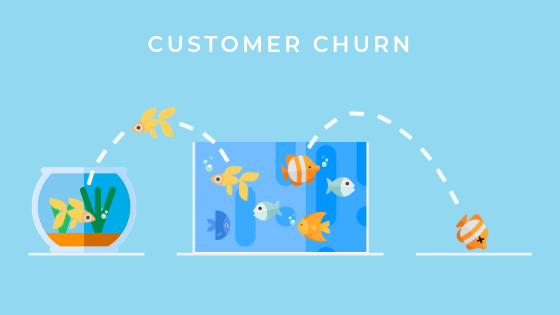

**Customer churn** is a situation when subscribers or customers stop taking service from the campany. Whether a customer will switch to another service provider or not is a problem which comes under classification technique. We have various classification techniques to predict customer churn.

So lets get started!!!

**Importing Libraries**

In [ ]:
!pip install sweetviz
import numpy as np
import pandas as pd
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt


**Reading Data**

In [ ]:
data = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head()

In [ ]:
data.shape

So we have successfully read the data. Now let's Check for the missing values and make our hands dirty in doing some data preprocessing. 


In [ ]:
data.isnull().sum()  # Checking the number values missing values in each feature 

In [ ]:
sns.heatmap(data.isnull(),cmap = 'magma' )

Great!!!
We don't have missing values in any column. 
Now we can proceed further to perform EDA
There is a beautiful library to visualize our features and see the characteristics of each feature. 

In [ ]:
eda = sv.analyze([data, "data"],target_feat='Churn')

In [ ]:
eda.show_html('Report.html')

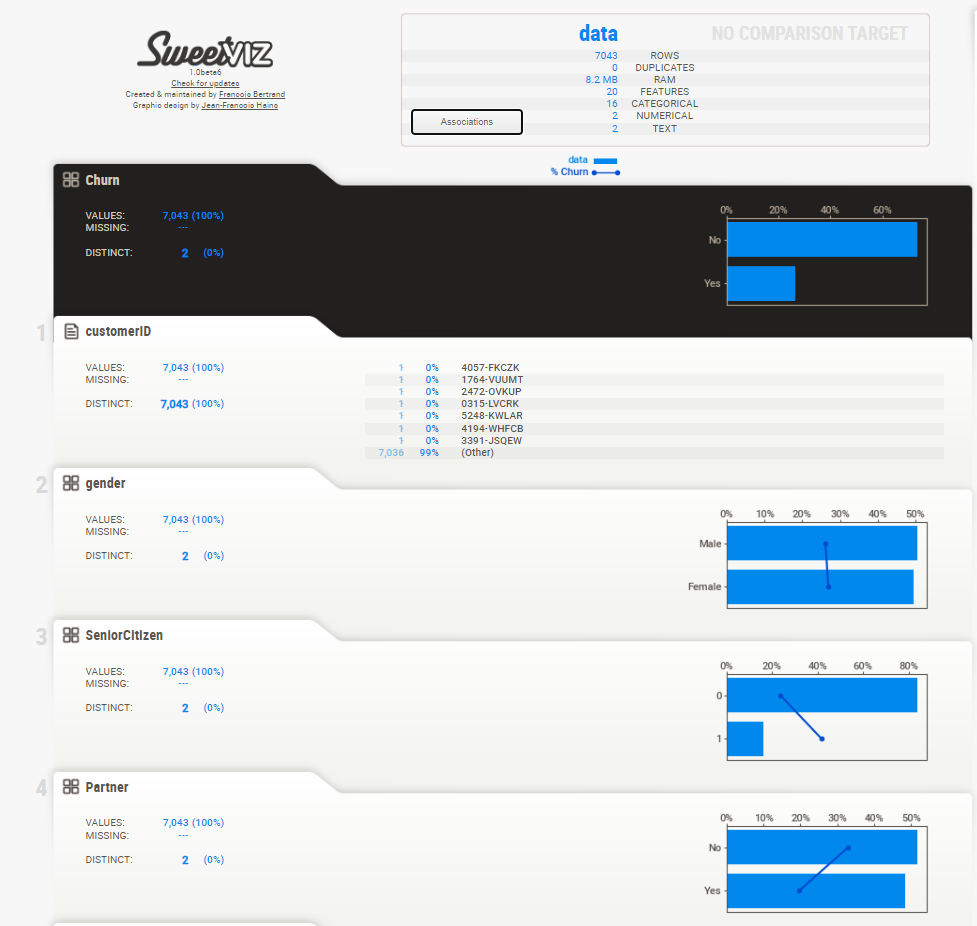

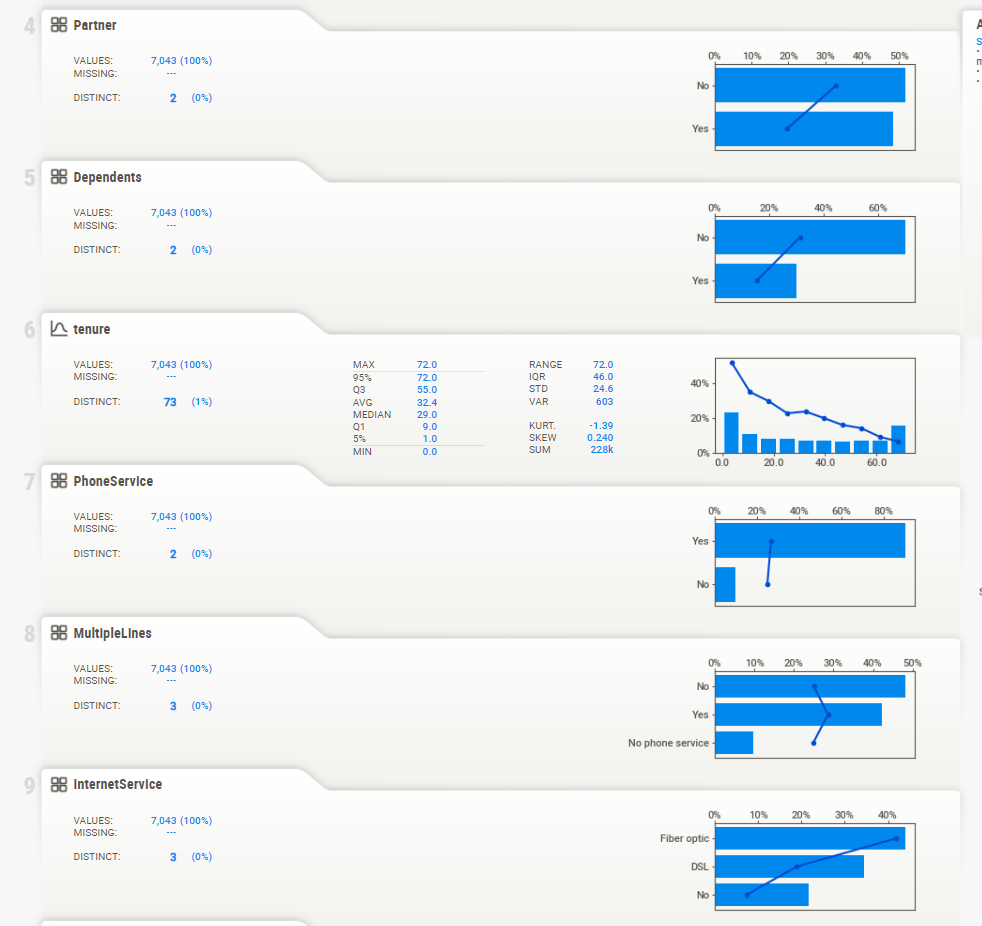

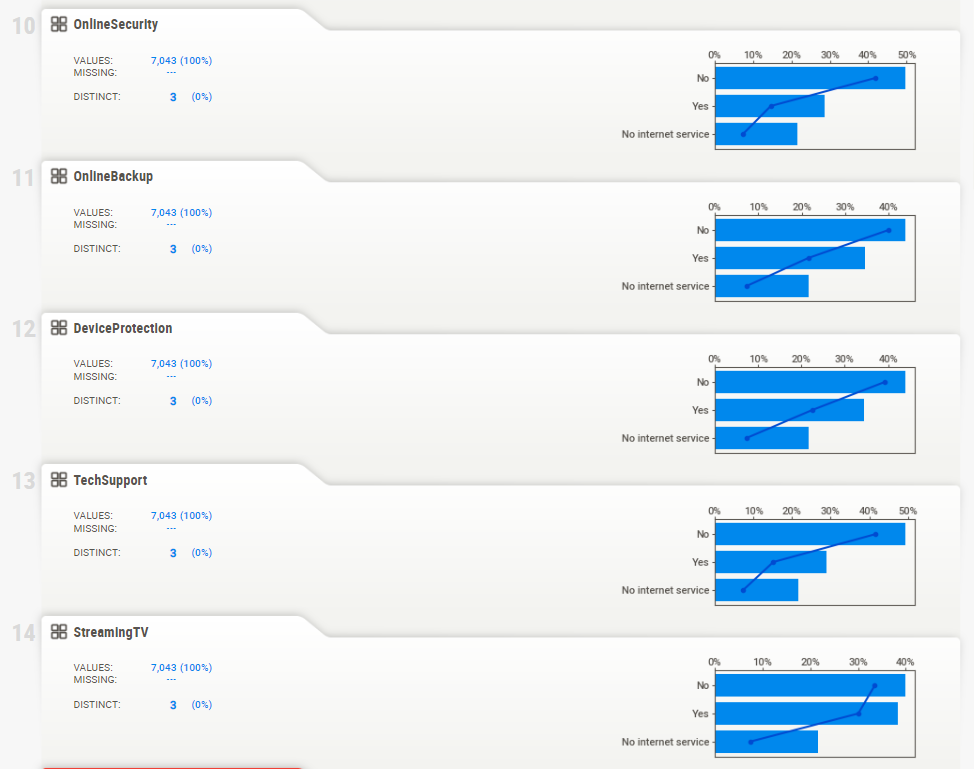

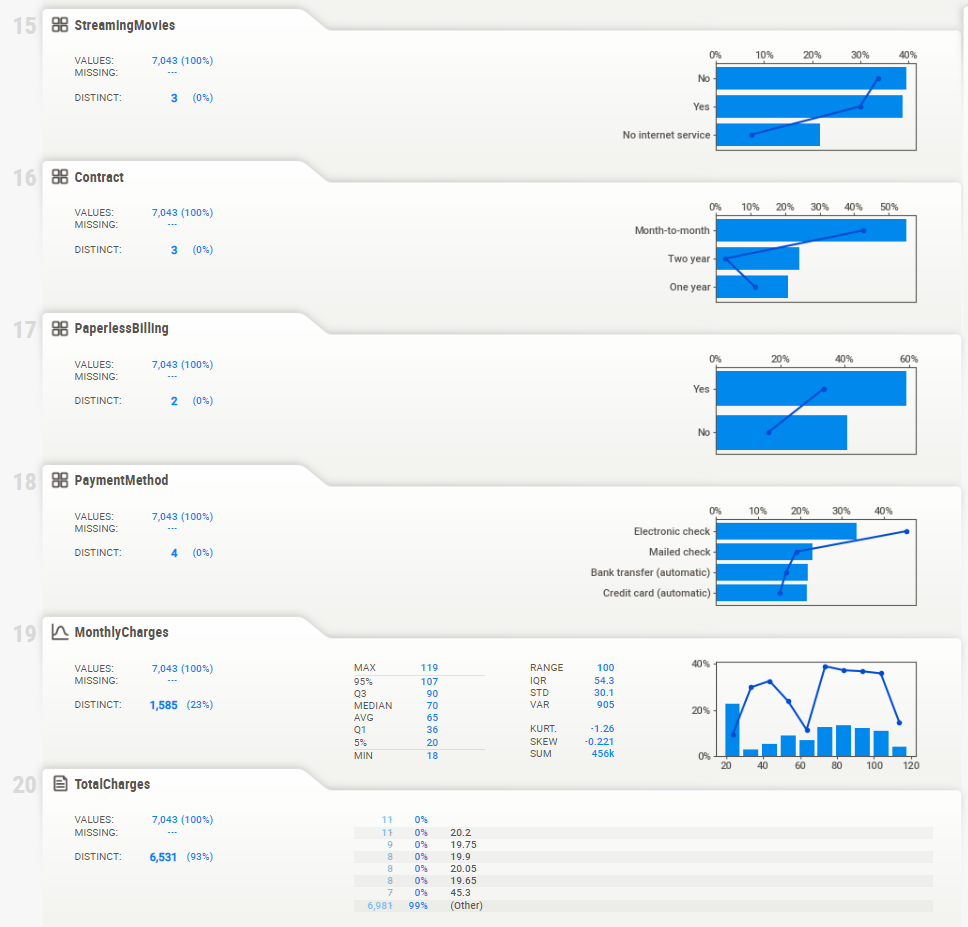

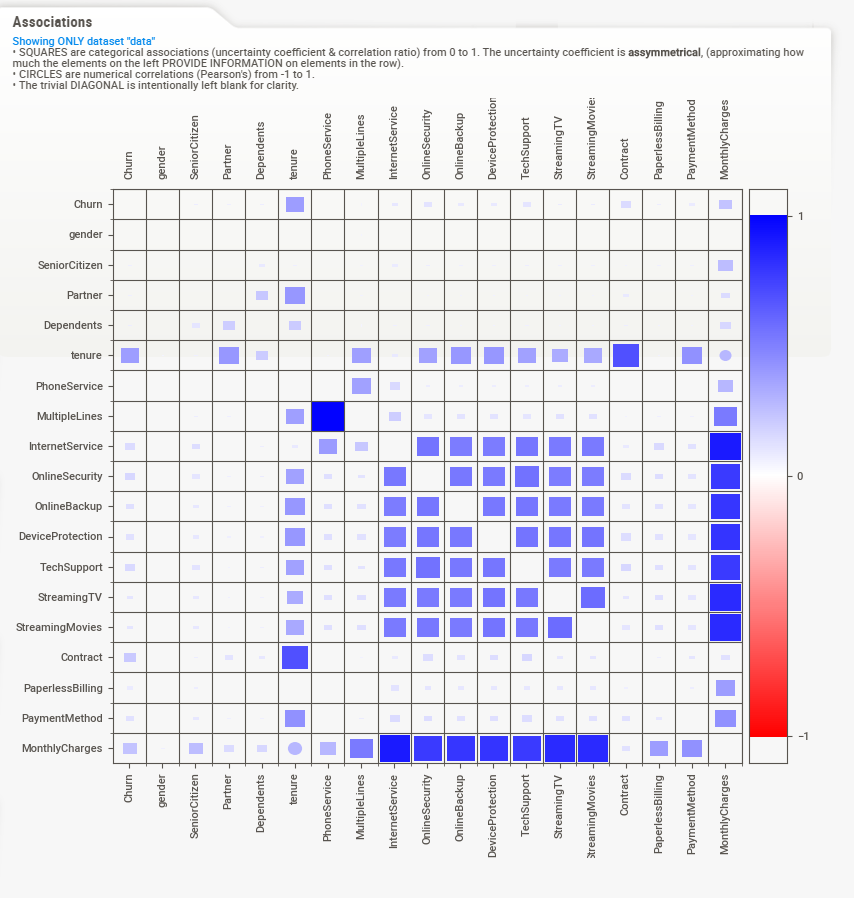

Since CustomerID need not to be included for the prediction, so we can drop it.

In [ ]:
data.drop('customerID', axis = 1, inplace = True)  

In [ ]:
from sklearn.preprocessing import LabelEncoder                 # Converting categorical churn column into numerical
le = LabelEncoder()
data['Churn'] = le.fit_transform(data.Churn)

In [ ]:
df = pd.get_dummies(data)                           

In [ ]:
X = df.drop('Churn', axis = 1)                # Defining X and y variables
y = df['Churn'] 

**Importing necessary libraries for Prediction**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**Prediction using Logistic Regression**

In [ ]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

lm_accuracy = round(lm.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', lm_accuracy)


**Prediction using KNN**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_accuracy = round(knn.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', knn_accuracy)

**Prediction using Support Vector Classifier**

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

svc_accuracy = round(svc.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', svc_accuracy)

**Prediction using Decision Tree**

In [ ]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

dt_accuracy = round(dt.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', dt_accuracy)

**Prediction using Random Forest**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_accuracy = round(rf.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', rf_accuracy)

**Prediction using Boosting Technique(Xgboost)**

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

xgb_accuracy = round(xgb.score(X_test, y_test) * 100, 2)
print('Test Accuracy: ', xgb_accuracy)

**Conclusion**
From the prediction accuracy, Logistic Regression model serves to fit better for the given problem. 

Thank You for reading!!